In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import webtfkerasToEstimator as web
import tensorflow as tf
tf.__version__

'2.0.0-alpha0'

In [2]:
%%time
data_input_file="../usask_access_log"
train_data, train_label, validation_data, validation_label, test_data, test_label = web.data_preparation_moe(data_input_file)
predicted_indexes_moe=web.main1(data_input_file)


W0513 06:24:11.720912 140736149980032 cross_device_ops.py:1111] Not all devices in `tf.distribute.Strategy` are visible to TensorFlow.


Training data shape = (2408625, 1)
Validation data shape = (2408625, 1)
Test data shape = (2408625, 1)
input_shape=(None, 1)
input shape=(None, 1)
self.expert_kernels=(1, 16, 8)
input_shape=(None, 16)
input_shape=(None, 8)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
mmoe_layers (MMoE)           (None, 16)                272       
_________________________________________________________________
tower_layer (Dense)          (None, 8)                 136       
_________________________________________________________________
y0 (Dense)                   (None, 1)                 9         
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________
input_shape=(None, 1)
input shape=(Non

W0513 06:24:57.073252 140736149980032 deprecation.py:323] From /Users/shreyadutta/conda/anaconda2/envs/py36/envs/tf2/lib/python3.6/site-packages/tensorflow/python/ops/metrics_impl.py:363: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.


input_shape=(None, 1)
input shape=(None, 1)
self.expert_kernels=(1, 16, 8)
input_shape=(None, 16)
input_shape=(None, 8)


W0513 06:24:57.230074 140736149980032 deprecation.py:323] From /Users/shreyadutta/conda/anaconda2/envs/py36/envs/tf2/lib/python3.6/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


CPU times: user 2min 47s, sys: 12 s, total: 2min 59s
Wall time: 2min 46s


In [3]:
%%time
predicted_indexes_moe_array=[p['y0'] for p in predicted_indexes_moe]

input_shape=(None, 1)
input shape=(None, 1)
self.expert_kernels=(1, 16, 8)
input_shape=(None, 16)
input_shape=(None, 8)
CPU times: user 22.6 s, sys: 1.41 s, total: 24 s
Wall time: 21.1 s


In [4]:
import numpy as np
predicted_indexes_moe_list=np.array([p.tolist()[0] for p in predicted_indexes_moe_array])

In [5]:
test_label=np.array([t[0] for t in test_label])

In [6]:
test_label

array([      0,       1,       2, ..., 2408622, 2408623, 2408624])

In [7]:
predicted_indexes_moe = predicted_indexes_moe_list
#predicted_indexes_moe=predicted_indexes_moe.squeeze()
import pandas as pd
predicted_indexes_moe_df = pd.DataFrame({'predicted_index':predicted_indexes_moe,'actual_index':test_label})


In [8]:
error_in_index_moe=predicted_indexes_moe-test_label

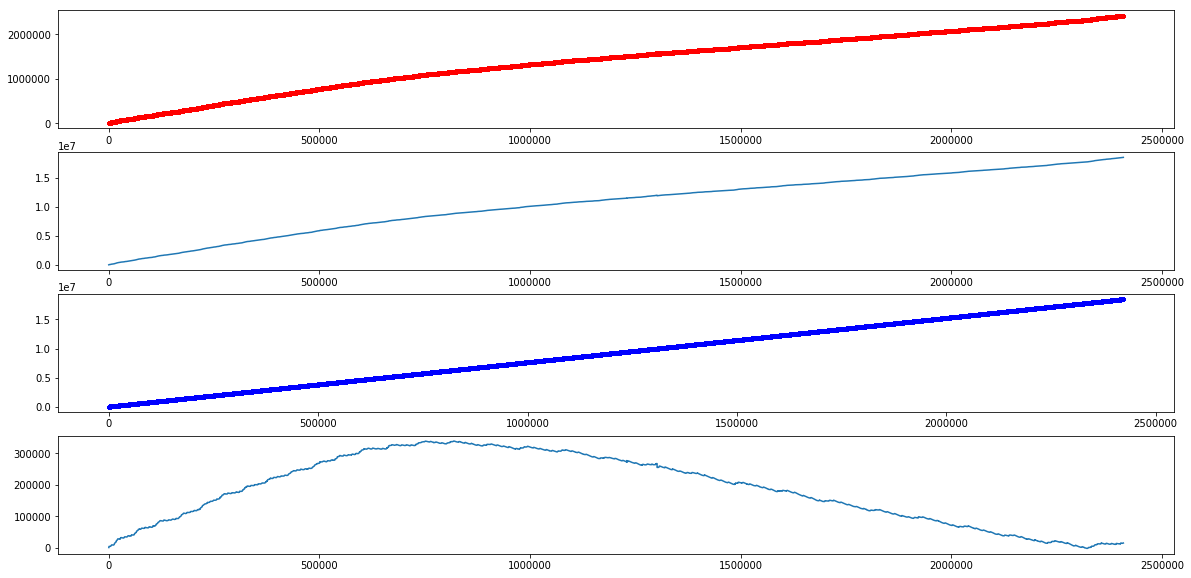

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(411)
ax.plot(predicted_indexes_moe_df.actual_index, predicted_indexes_moe_df.predicted_index,'r.');

ax = fig.add_subplot(412)
ax.plot([t[0] for t in train_label] , train_data)

ax = fig.add_subplot(413)
ax.plot(predicted_indexes_moe_df.predicted_index , train_data, 'b.')

ax = fig.add_subplot(414)
ax.plot([t[0] for t in train_label], error_in_index_moe)

W0513 06:45:34.167951 140736149980032 cross_device_ops.py:1111] Not all devices in `tf.distribute.Strategy` are visible to TensorFlow.


Training data shape = (2408625, 1)
Validation data shape = (2408625, 1)
Test data shape = (2408625, 1)
input_shape=(None, 1)
input shape=(None, 1)
self.expert_kernels=(1, 16, 8)
input_shape=(None, 16)
input_shape=(None, 8)
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
mmoe_layers (MMoE)           (None, 16)                272       
_________________________________________________________________
tower_layer (Dense)          (None, 8)                 136       
_________________________________________________________________
y0 (Dense)                   (None, 1)                 9         
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________
model.input_names=['input_2']
input_

W0513 06:45:46.814365 140736149980032 deprecation.py:323] From /Users/shreyadutta/conda/anaconda2/envs/py36/envs/tf2/lib/python3.6/site-packages/tensorflow/python/training/saver.py:1069: get_checkpoint_mtimes (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file utilities to get mtimes.


input_shape=(None, 1)
input shape=(None, 1)
self.expert_kernels=(1, 16, 8)
input_shape=(None, 16)
input_shape=(None, 8)
input_shape=(None, 1)
input shape=(None, 1)
self.expert_kernels=(1, 16, 8)
input_shape=(None, 16)
input_shape=(None, 8)


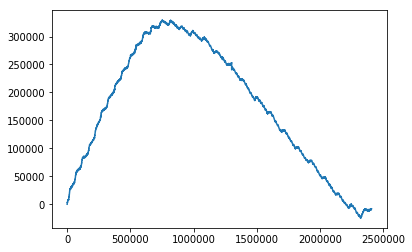

In [12]:
train_data, train_label, validation_data, validation_label, test_data, test_label = web.data_preparation_moe(data_input_file)
predicted_indexes_moe=web.main1(data_input_file)
predicted_indexes_moe_array=[p['y0'] for p in predicted_indexes_moe]
import numpy as np
predicted_indexes_moe_list=np.array([p.tolist()[0] for p in predicted_indexes_moe_array])
test_label=np.array([t[0] for t in test_label])

predicted_indexes_moe = predicted_indexes_moe_list
#predicted_indexes_moe=predicted_indexes_moe.squeeze()
import pandas as pd
predicted_indexes_moe_df = pd.DataFrame({'predicted_index':predicted_indexes_moe,'actual_index':test_label})

error_in_index_moe=predicted_indexes_moe-test_label
import matplotlib.pyplot as plt

plt.plot([t[0] for t in train_label], error_in_index_moe)

W0513 06:50:07.540656 140736149980032 cross_device_ops.py:1111] Not all devices in `tf.distribute.Strategy` are visible to TensorFlow.


Training data shape = (2408625, 1)
Validation data shape = (2408625, 1)
Test data shape = (2408625, 1)
input_shape=(None, 1)
input shape=(None, 1)
self.expert_kernels=(1, 16, 8)
input_shape=(None, 16)
input_shape=(None, 8)
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
mmoe_layers (MMoE)           (None, 16)                272       
_________________________________________________________________
tower_layer (Dense)          (None, 8)                 136       
_________________________________________________________________
y0 (Dense)                   (None, 1)                 9         
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________
model.input_names=['input_3']
input_

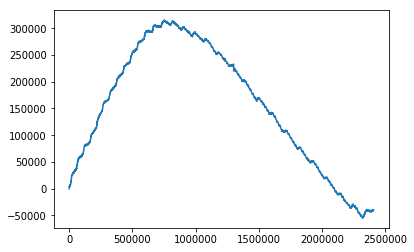

In [13]:
%%time
train_data, train_label, validation_data, validation_label, test_data, test_label = web.data_preparation_moe(data_input_file)
predicted_indexes_moe=web.main1(data_input_file)
predicted_indexes_moe_array=[p['y0'] for p in predicted_indexes_moe]
import numpy as np
predicted_indexes_moe_list=np.array([p.tolist()[0] for p in predicted_indexes_moe_array])
test_label=np.array([t[0] for t in test_label])

predicted_indexes_moe = predicted_indexes_moe_list
#predicted_indexes_moe=predicted_indexes_moe.squeeze()
import pandas as pd
predicted_indexes_moe_df = pd.DataFrame({'predicted_index':predicted_indexes_moe,'actual_index':test_label})

error_in_index_moe=predicted_indexes_moe-test_label
import matplotlib.pyplot as plt

plt.plot([t[0] for t in train_label], error_in_index_moe)

W0513 07:06:56.626518 140736149980032 cross_device_ops.py:1111] Not all devices in `tf.distribute.Strategy` are visible to TensorFlow.


Training data shape = (2408625, 1)
Validation data shape = (2408625, 1)
Test data shape = (2408625, 1)
input_shape=(None, 1)
input shape=(None, 1)
self.expert_kernels=(1, 16, 8)
input_shape=(None, 16)
input_shape=(None, 8)
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
mmoe_layers (MMoE)           (None, 16)                272       
_________________________________________________________________
tower_layer (Dense)          (None, 8)                 136       
_________________________________________________________________
y0 (Dense)                   (None, 1)                 9         
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________
model.input_names=['input_4']
input_

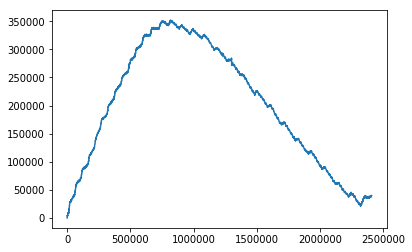

In [14]:
%%time
train_data, train_label, validation_data, validation_label, test_data, test_label = web.data_preparation_moe(data_input_file)
predicted_indexes_moe=web.main1(data_input_file)
predicted_indexes_moe_array=[p['y0'] for p in predicted_indexes_moe]
import numpy as np
predicted_indexes_moe_list=np.array([p.tolist()[0] for p in predicted_indexes_moe_array])
test_label=np.array([t[0] for t in test_label])

predicted_indexes_moe = predicted_indexes_moe_list
#predicted_indexes_moe=predicted_indexes_moe.squeeze()
import pandas as pd
predicted_indexes_moe_df = pd.DataFrame({'predicted_index':predicted_indexes_moe,'actual_index':test_label})

error_in_index_moe=predicted_indexes_moe-test_label
import matplotlib.pyplot as plt

plt.plot([t[0] for t in train_label], error_in_index_moe)

W0513 07:10:06.608612 140736149980032 cross_device_ops.py:1111] Not all devices in `tf.distribute.Strategy` are visible to TensorFlow.


Training data shape = (2408625, 1)
Validation data shape = (2408625, 1)
Test data shape = (2408625, 1)
input_shape=(None, 1)
input shape=(None, 1)
self.expert_kernels=(1, 16, 8)
input_shape=(None, 16)
input_shape=(None, 8)
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
mmoe_layers (MMoE)           (None, 16)                272       
_________________________________________________________________
tower_layer (Dense)          (None, 8)                 136       
_________________________________________________________________
y0 (Dense)                   (None, 1)                 9         
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________
model.input_names=['input_5']
input_

W0513 07:18:46.313832 140736149980032 deprecation.py:323] From /Users/shreyadutta/conda/anaconda2/envs/py36/envs/tf2/lib/python3.6/site-packages/tensorflow/python/training/saver.py:965: remove_checkpoint (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to delete files with this prefix.


input_shape=(None, 1)
input shape=(None, 1)
self.expert_kernels=(1, 16, 8)
input_shape=(None, 16)
input_shape=(None, 8)
input_shape=(None, 1)
input shape=(None, 1)
self.expert_kernels=(1, 16, 8)
input_shape=(None, 16)
input_shape=(None, 8)
CPU times: user 3min 17s, sys: 13.3 s, total: 3min 30s
Wall time: 11min 19s


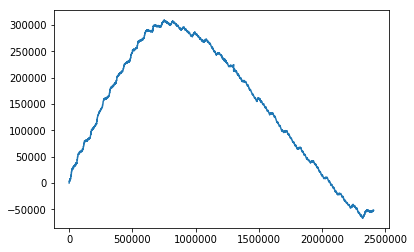

In [15]:
%%time
train_data, train_label, validation_data, validation_label, test_data, test_label = web.data_preparation_moe(data_input_file)
predicted_indexes_moe=web.main1(data_input_file)
predicted_indexes_moe_array=[p['y0'] for p in predicted_indexes_moe]
import numpy as np
predicted_indexes_moe_list=np.array([p.tolist()[0] for p in predicted_indexes_moe_array])
test_label=np.array([t[0] for t in test_label])

predicted_indexes_moe = predicted_indexes_moe_list
#predicted_indexes_moe=predicted_indexes_moe.squeeze()
import pandas as pd
predicted_indexes_moe_df = pd.DataFrame({'predicted_index':predicted_indexes_moe,'actual_index':test_label})

error_in_index_moe=predicted_indexes_moe-test_label
import matplotlib.pyplot as plt

plt.plot([t[0] for t in train_label], error_in_index_moe)